In [112]:
#BIOF309 FINAL PROJECT PART 2 of 2
#This is an extension of an EDA investigating Crime in Chicago 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
from datetime import datetime

In [113]:
#Read in Data Frame
df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', index_col='Date', parse_dates = True)
print(df.head())

                     Unnamed: 0        ID Case Number                Block  \
Date                                                                         
2016-05-03 23:40:00           3  10508693    HZ250496   013XX S SAWYER AVE   
2016-05-03 21:40:00          89  10508695    HZ250409   061XX S DREXEL AVE   
2016-05-03 23:31:00         197  10508697    HZ250503  053XX W CHICAGO AVE   
2016-05-03 22:10:00         673  10508698    HZ250424    049XX W FULTON ST   
2016-05-03 22:00:00         911  10508699    HZ250455    003XX N LOTUS AVE   

                     IUCR            Primary Type              Description  \
Date                                                                         
2016-05-03 23:40:00  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
2016-05-03 21:40:00  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
2016-05-03 23:31:00  0470  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
2016-05-03 22:10:00  0460                 BATTERY              

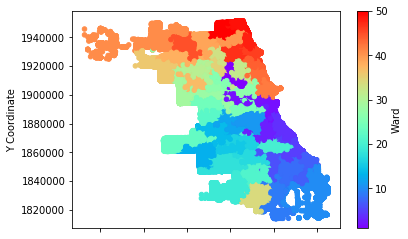

In [117]:
#Image map using X and Y coordinates and full data set (for more dense picture of Chicago)
df_clean.plot(kind='scatter',x='X Coordinate', y='Y Coordinate', 
              c='Ward', cmap=plt.get_cmap('rainbow'))
plt.show()

In [114]:
#Restrict size of DataFrame to extract only relevent columns
df=df[['Primary Type', 'Description', 'Arrest', 'Domestic', 'Ward', 'X Coordinate', 'Y Coordinate', 'Location']]
print(df)
print(type(df))

                                   Primary Type  \
Date                                              
2016-05-03 23:40:00                     BATTERY   
2016-05-03 21:40:00                     BATTERY   
2016-05-03 23:31:00      PUBLIC PEACE VIOLATION   
2016-05-03 22:10:00                     BATTERY   
2016-05-03 22:00:00                       THEFT   
2016-05-03 22:35:00                     BATTERY   
2016-05-03 22:30:00                     BATTERY   
2016-05-03 21:30:00                     BATTERY   
2016-05-03 16:00:00                     BATTERY   
2016-05-03 22:30:00                     BATTERY   
2016-05-03 21:44:00           WEAPONS VIOLATION   
2016-05-03 23:11:00                     BATTERY   
2016-05-03 17:30:00                       THEFT   
2016-05-03 09:00:00                       THEFT   
2016-05-03 22:08:00                       THEFT   
2016-05-03 16:00:00                     BATTERY   
2016-05-03 21:45:00                       THEFT   
2016-05-03 22:00:00            

In [115]:
#Narrow Index by Year and See total crimes by year
df_years = df.index.year
df_all = df.groupby(df_years).count()
df_all.head()

,Primary Type,Description,Arrest,Domestic,Ward,X Coordinate,Y Coordinate,Location
Date,,,,,,,,
2012,335670,335670,335670,335670,335663,334753,334753,334753
2013,306703,306703,306703,306703,306700,304315,304315,304315
2014,274527,274527,274527,274527,274525,269465,269465,269465
2015,262995,262995,262995,262995,262993,259795,259795,259795
2016,265462,265462,265462,265462,265462,251273,251273,251273


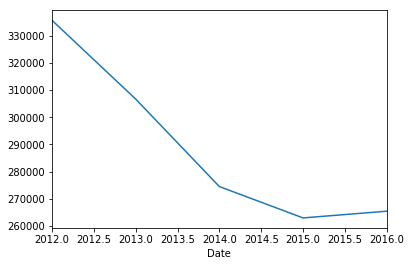

In [116]:
#Graph Total crimes by year
df_all['Primary Type'].iloc[0:5].plot()
plt.show()

In [11]:
#See crime by month
df_months = df_small.index.month
df_2 = df_small.groupby(df_months).count()
df_2

,Primary Type,Description,Location,Ward
Date,,,,
1,123809,123809,110291,123806
2,98073,98073,96109,98072
3,119010,119010,115776,119008
4,118064,118064,115483,118064
5,129735,129735,128061,129732
6,130575,130575,128822,130574
7,135762,135762,133793,135762
8,133738,133738,131758,133738
9,124067,124067,122166,124067


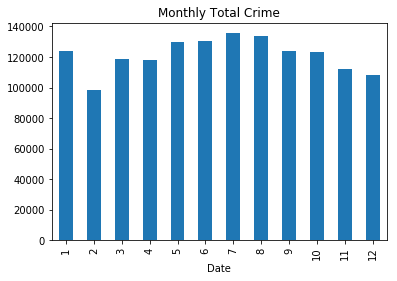

In [149]:
#Plot monthly total crime 
df_2['Primary Type'].plot(kind='bar')
plt.title('Monthly Total Crime')
plt.show()

In [133]:
#print out total numbers of each type of crime
df_types = df_small['Primary Type'].value_counts()
print(df_types)

THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1953
KIDNAPPING                      

In [218]:
#Group crimes by Ward and Primary Type 
df_vc = pd.DataFrame(df_clean.groupby('Ward')['Primary Type'].value_counts())
print(df_vc.loc[1:5])

                                        Primary Type
Ward Primary Type                                   
1.0  THEFT                                      9881
     BATTERY                                    3219
     CRIMINAL DAMAGE                            2939
     BURGLARY                                   2080
     MOTOR VEHICLE THEFT                        1351
     DECEPTIVE PRACTICE                         1299
     ASSAULT                                    1104
     ROBBERY                                     975
     OTHER OFFENSE                               899
     NARCOTICS                                   609
     CRIMINAL TRESPASS                           525
     PUBLIC PEACE VIOLATION                      111
     CRIM SEXUAL ASSAULT                          85
     SEX OFFENSE                                  83
     OFFENSE INVOLVING CHILDREN                   82
     WEAPONS VIOLATION                            71
     LIQUOR LAW VIOLATION                     

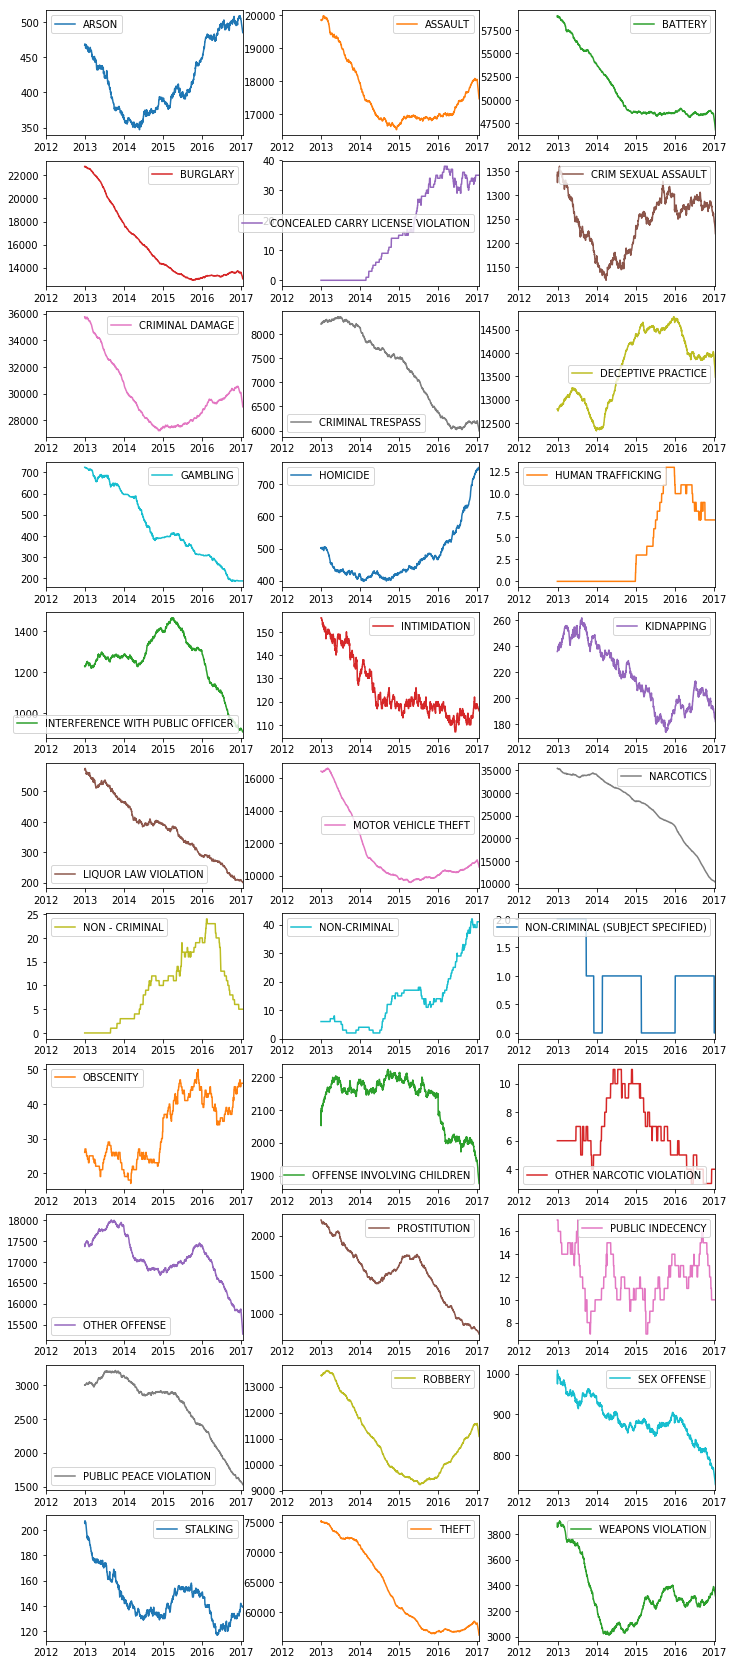

In [212]:
#Visualize Crime Trends Over Time for Each Individual Crime
df_final = df_clean.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=df_clean.index.date, fill_value=0)
df_final.index = pd.DatetimeIndex(df_final.index)
df_pl = df_final.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)
plt.show()

In [203]:
#Create a pivot table to view arson crimes in descending order by ward
df_piv=df_clean.pivot_table(index='Ward', columns='Primary Type', values='Description', aggfunc='count')
df_piv['ARSON'].sort_values(ascending=False)

Ward
17.0    105.0
24.0    101.0
34.0     95.0
15.0     91.0
28.0     86.0
37.0     86.0
16.0     81.0
31.0     73.0
29.0     67.0
6.0      66.0
7.0      64.0
9.0      61.0
30.0     61.0
20.0     60.0
26.0     56.0
8.0      55.0
27.0     55.0
22.0     54.0
12.0     52.0
13.0     52.0
14.0     50.0
10.0     48.0
25.0     46.0
21.0     46.0
11.0     45.0
23.0     39.0
1.0      38.0
18.0     36.0
2.0      35.0
35.0     34.0
3.0      31.0
33.0     27.0
5.0      27.0
38.0     24.0
39.0     24.0
36.0     23.0
32.0     22.0
44.0     19.0
49.0     18.0
42.0     15.0
47.0     14.0
4.0      14.0
45.0     13.0
19.0     12.0
50.0     12.0
48.0     11.0
46.0     10.0
40.0      9.0
41.0      7.0
43.0      5.0
Name: ARSON, dtype: float64